In [108]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [109]:
data = pd.read_csv('dataset/glass.csv')
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


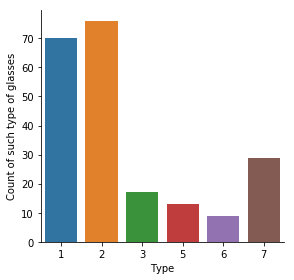

In [110]:
sns.factorplot(
    x='Type', 
    data=data, 
    kind='count'
).set_axis_labels('Type', 'Count of such type of glasses');

In [111]:
X = data.drop('Type', axis=1)
y = data['Type']

## Seperating testing and training data , normalizing the data 

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train, y_train)
X_test = sc.fit_transform(X_test, y_test)

## Elbow Method: Experimenting with different values of 'K' .

In [113]:
error_rate = [] 
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

## Visualizing different 'K' values and respective error rates to find optimal 'K' value:

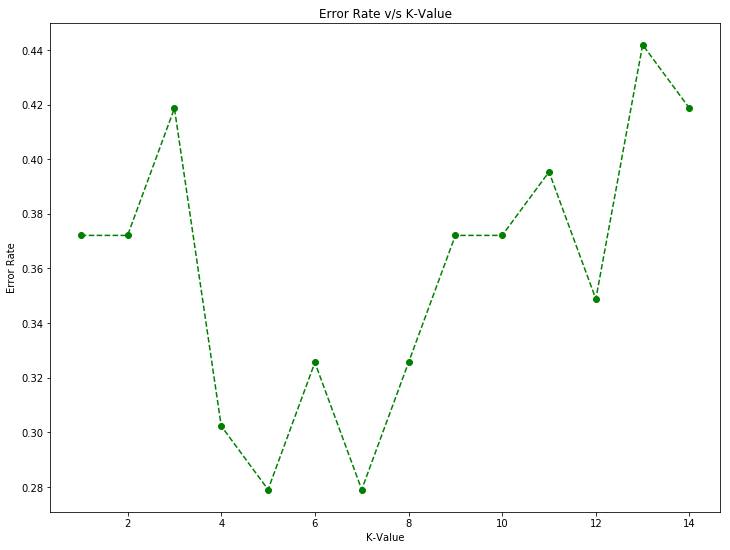

In [114]:
plt.figure(figsize=(12,9))
plt.plot(range(1,15), error_rate, color='green', linestyle='--', marker='o')
plt.title('Error Rate v/s K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

# Creating final kNN Model with K = 7:

In [118]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
expected_y=np.transpose(list(y_test))

## Evaluating our model :

In [119]:
ct=0
for i in range(len(y_pred)):
    if(y_pred[i]==expected_y[i]):
        ct=ct+1
print ("Accuracy of the used model(KNN with k = 4) is " + str((ct/len(y_test))*100) + " %")

Accuracy of the used model(KNN with k = 4) is 72.09302325581395 %


# Checking accuracy with decision tree also 

In [120]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
expected_y=np.transpose(list(y_test))
ct=0
for i in range(len(y_pred)):
    if(y_pred[i]==expected_y[i]):
        ct=ct+1
print ("Accuracy of the used model(Decision Tree) is " + str((ct/len(y_test))*100) + " %")

Accuracy of the used model(Decision Tree) is 69.76744186046511 %
